In [2]:
#Please run this first


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#import modules

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
from statsmodels.base.model import GenericLikelihoodModel
from sklearn.model_selection import train_test_split
from scipy import spatial
import copy
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
dcf_euclidean_rmse= pd.read_csv("/content/drive/My Drive/BA_Project/Final/dcf_euclidean/dcf_euclidean_rmse2020_08_28_04_17_21.csv")

In [8]:
dcf_cosine = pd.read_csv("/content/drive/My Drive/BA_Project/Final/dcf_cosine/dcf_cosine_rmse2020_08_28_03_17_46.csv")

In [4]:
baseline = pd.read_csv("/content/drive/My Drive/BA_Project/Final/baseline/baseline_rmse2020_08_28_03_32_32.csv")

In [6]:
baseline

,Unnamed: 0,RMSE,roll_avg,method
0,2,2.429379,NaN,baseline
1,3,2.611148,NaN,baseline
2,4,2.856082,NaN,baseline
3,5,2.901220,NaN,baseline
4,6,2.465525,NaN,baseline
...,...,...,...,...
96,196,2.465638,2.389485,baseline
97,243,2.115591,2.371265,baseline
98,246,1.507116,2.315141,baseline
99,261,1.863994,2.275562,baseline


In [9]:
df_all = pd.concat([dcf_euclidean_rmse,dcf_cosine,baseline])

In [13]:
df_all.rename(columns= {'Unnamed: 0':'MovieCount'},inplace=True)

In [22]:
import seaborn as sns;

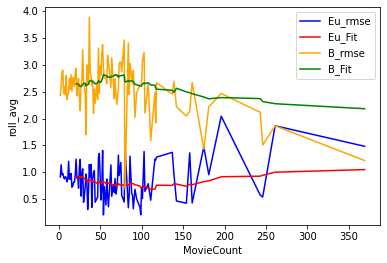

In [40]:

ax = sns.lineplot(x="MovieCount", y="RMSE", data=df_all[df_all['method']=='euclidean'],color="blue", label="Eu_rmse", linestyle="-")
ax = sns.lineplot(x="MovieCount", y="roll_avg", data=df_all[df_all['method']=='euclidean'],color="red", label="Eu_Fit", linestyle="-")
ax = sns.lineplot(x="MovieCount", y="RMSE", data=df_all[df_all['method']=='baseline'],color="orange", label="B_rmse", linestyle="-")
ax = sns.lineplot(x="MovieCount", y="roll_avg", data=df_all[df_all['method']=='baseline'],color="green", label="B_Fit", linestyle="-")


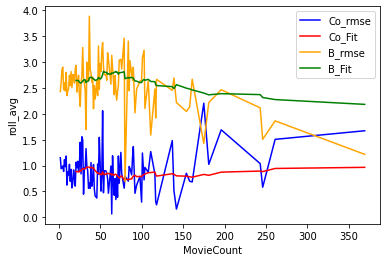

In [39]:

ax = sns.lineplot(x="MovieCount", y="RMSE", data=df_all[df_all['method']=='cosine'],color="blue", label="Co_rmse", linestyle="-")
ax = sns.lineplot(x="MovieCount", y="roll_avg", data=df_all[df_all['method']=='cosine'],color="red", label="Co_Fit", linestyle="-")
ax = sns.lineplot(x="MovieCount", y="RMSE", data=df_all[df_all['method']=='baseline'],color="orange", label="B_rmse", linestyle="-")
ax = sns.lineplot(x="MovieCount", y="roll_avg", data=df_all[df_all['method']=='baseline'],color="green", label="B_Fit", linestyle="-")


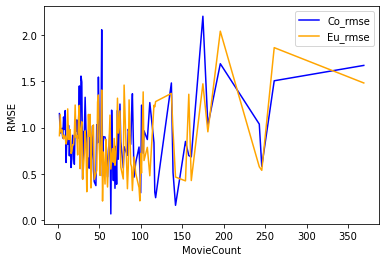

In [36]:

ax = sns.lineplot(x="MovieCount", y="RMSE", data=df_all[df_all['method']=='cosine'],color="blue", label="Co_rmse", linestyle="-")

ax = sns.lineplot(x="MovieCount", y="RMSE", data=df_all[df_all['method']=='euclidean'],color="orange", label="Eu_rmse", linestyle="dashed")



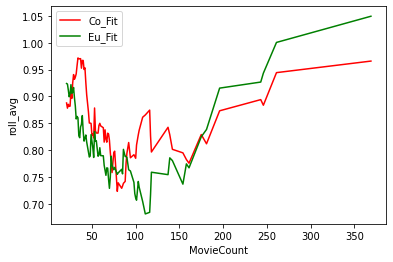

In [38]:
ax = sns.lineplot(x="MovieCount", y="roll_avg", data=df_all[df_all['method']=='cosine'],color="red", label="Co_Fit", linestyle="-")
ax = sns.lineplot(x="MovieCount", y="roll_avg", data=df_all[df_all['method']=='euclidean'],color="green", label="Eu_Fit", linestyle="dashed",sizes=[])